In [2]:
import tensorflow_datasets as tfds

dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
tokenizer = info.features['text'].encoder

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteE0OJUX/imdb_reviews-train.tfrecord*...…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteE0OJUX/imdb_reviews-test.tfrecord*...:…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteE0OJUX/imdb_reviews-unsupervised.tfrec…

Dataset imdb_reviews downloaded and prepared to ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

train_data, test_data = dataset['train'], dataset['test']
train_dataset = train_data.shuffle(BUFFER_SIZE)

train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [4]:
import tensorflow as tf

embedding_dim = 64
lstm_dim = 64
dense_dim = 64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
NUM_EPOCHS = 10

history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
98/98 [==============================] - 34s 267ms/step - loss: 0.6025 - accuracy: 0.6623 - val_loss: 0.4805 - val_accuracy: 0.7824
Epoch 2/10
98/98 [==============================] - 24s 247ms/step - loss: 0.3505 - accuracy: 0.8574 - val_loss: 0.4034 - val_accuracy: 0.8388
Epoch 3/10
98/98 [==============================] - 25s 250ms/step - loss: 0.2435 - accuracy: 0.9094 - val_loss: 0.3696 - val_accuracy: 0.8484
Epoch 4/10
98/98 [==============================] - 26s 259ms/step - loss: 0.1914 - accuracy: 0.9324 - val_loss: 0.4035 - val_accuracy: 0.8526
Epoch 5/10
98/98 [==============================] - 24s 248ms/step - loss: 0.1639 - accuracy: 0.9433 - val_loss: 0.4076 - val_accuracy: 0.8448
Epoch 6/10
98/98 [==============================] - 24s 248ms/step - loss: 0.1451 - accuracy: 0.9492 - val_loss: 0.5020 - val_accuracy: 0.8472
Epoch 7/10
98/98 [==============================] - 25s 250ms/step - loss: 0.1296 - accuracy: 0.9572 - val_loss: 0.5231 - val_accuracy: 0.8462

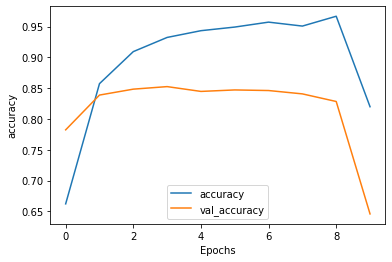

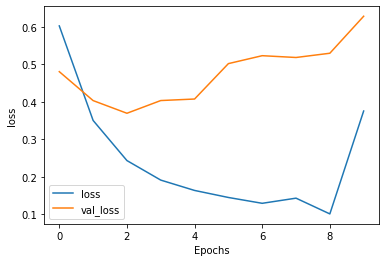

In [7]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")